In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.models import mfx

Can't find epics package. PPM_Imager class will not be supported


In [2]:
mfx_sim = mfx.MFX(9500)

FWHM in x: 50.063160108007565 microns
FWHM in y: 50.063160108007565 microns
FWHM Divergence (x): 1.6 μrad
FWHM Divergence (y): 1.6 μrad
x is focused
y is focused


In [5]:
%%capture capt
mfx_sim.propagate()

[<Axes: title={'center': 'DG3_YAG'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

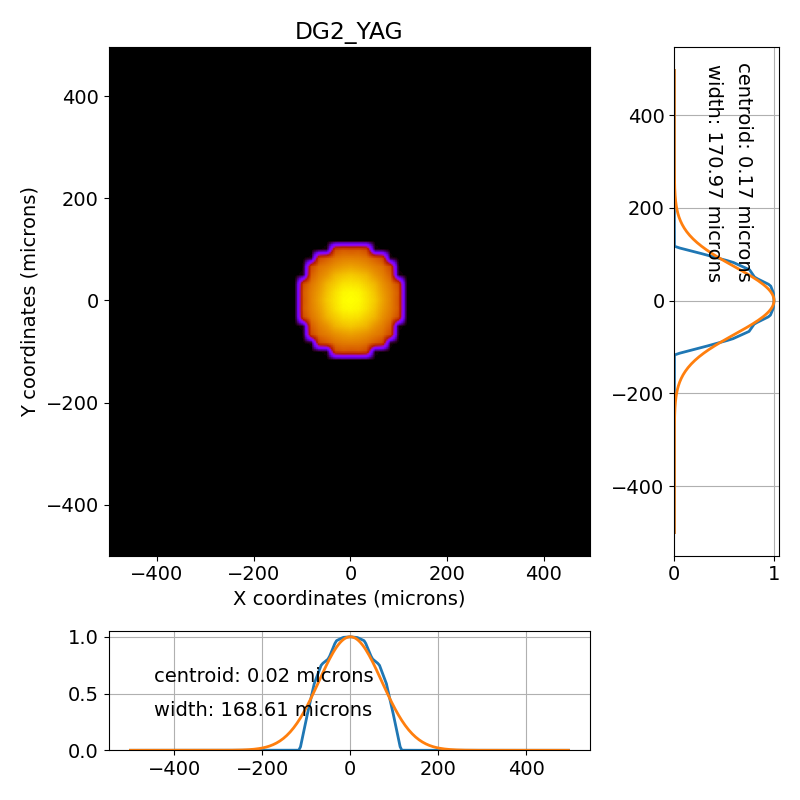

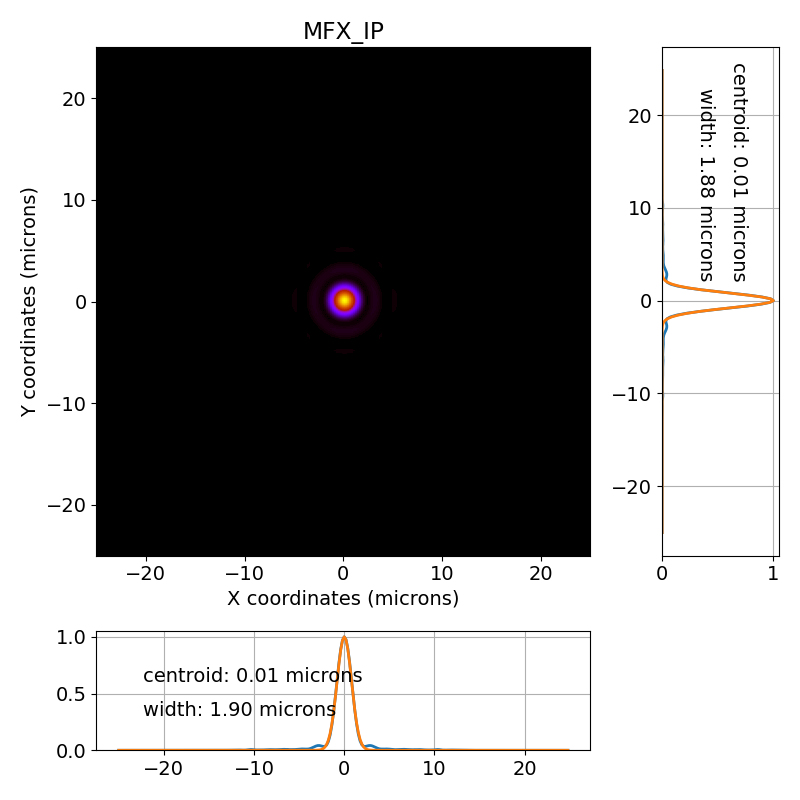

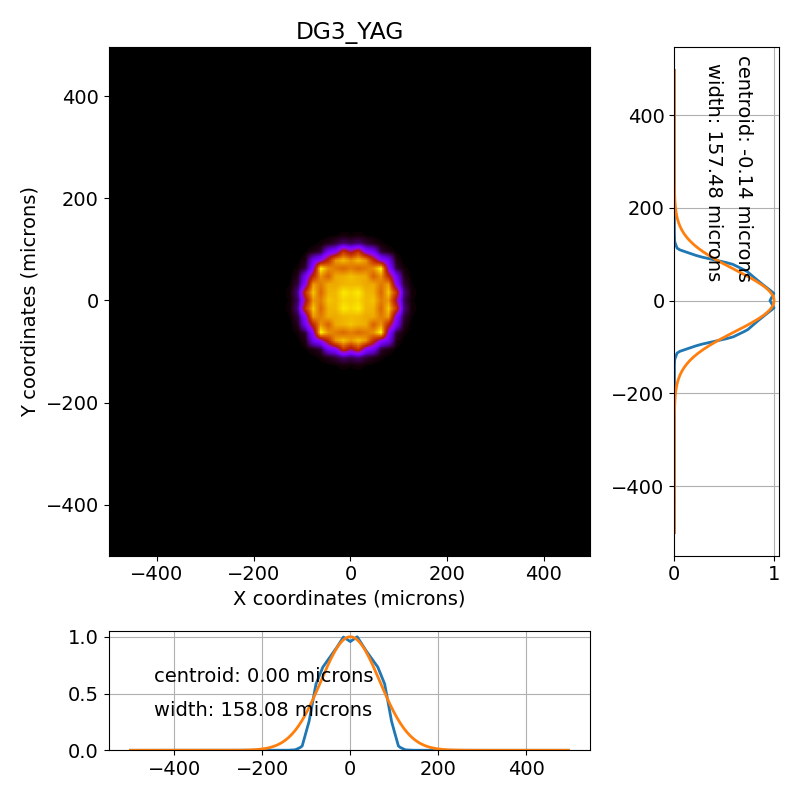

In [6]:
mfx_sim.beamline.DG2_YAG.view_beam()
mfx_sim.beamline.MFX_IP.view_beam()
mfx_sim.beamline.DG3_YAG.view_beam()